<a href="https://colab.research.google.com/github/danhluu/Automatic_Speech_Recognition/blob/master/MNIST_Dense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Load MNIST dataset
# MNIST dataset has a shape of (70000, 784) meaning there are 70,000 images with 784 dimensions (784 features).
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")

In [ ]:
#Explore the first image in MNIST dataset
mnist.data[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

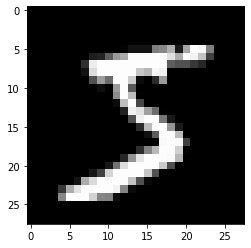

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(mnist.data[0].reshape(28,28), cmap='gray')

In [ ]:
mnist.target[0]

'5'

In [ ]:
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)
train_lbl[0:10]
train_img.shape

(60000, 784)

In [ ]:
from tensorflow.keras.utils import to_categorical
train_onehot_lbl = to_categorical(train_lbl,num_classes=10)
test_onehot_lbl = to_categorical(test_lbl,num_classes=10)
train_onehot_lbl[0:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

input_layer = Input(shape=(784,))
hidden_layer = Dense(30,activation="sigmoid")(input_layer)
dense_layer = Dense(10, activation="softmax")(hidden_layer)

model = Model(inputs=input_layer, outputs=dense_layer)
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=["accuracy"])

model.fit(train_img,train_onehot_lbl,validation_data=(test_img,test_onehot_lbl), epochs= 20, batch_size=20)


Epoch 1/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.7706 - accuracy: 0.7878 - val_loss: 0.4896 - val_accuracy: 0.8527
Epoch 2/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.4766 - accuracy: 0.8595 - val_loss: 0.4773 - val_accuracy: 0.8568
Epoch 3/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.4312 - accuracy: 0.8675 - val_loss: 0.4236 - val_accuracy: 0.8739
Epoch 4/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.4111 - accuracy: 0.8764 - val_loss: 0.3978 - val_accuracy: 0.8792
Epoch 5/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.3895 - accuracy: 0.8825 - val_loss: 0.4346 - val_accuracy: 0.8726
Epoch 6/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.3911 - accuracy: 0.8813 - val_loss: 0.4182 - val_accuracy: 0.8768
Epoch 7/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.3959 - accuracy: 0.8802 - val_loss: 0.3937 - val_accuracy:

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

input_layer = Input(shape=(784,))
dense_layer1 = Dense(100,activation="sigmoid")(input_layer) 
dense_layer1 = Dense(80,activation="sigmoid")(dense_layer1) 
dense_layer2 = Dense(10, activation="softmax")(dense_layer1)  

model = Model(inputs=input_layer, outputs=dense_layer2)
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=["accuracy"])

model.summary()

model.fit(train_img,train_onehot_lbl,validation_data=(test_img,test_onehot_lbl), epochs= 5, batch_size=10)


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 80)                8080      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                810       
Total params: 87,390
Trainable params: 87,390
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
6000/6000 [==============================] - 12s 2ms/step - loss: 0.5637 - accuracy: 0.8381 - val_loss: 0.4137 - val_accuracy: 0.8775
Epoch 2/5
6000/6000 [==============================] - 12s 2ms/step - loss: 0.3802 - accuracy: 0.8823 - val_l

In [ ]:
model.predict(test_img[0:2])

array([[9.5259643e-01, 9.7954955e-07, 1.5860187e-03, 6.6584318e-05,
        1.5204137e-03, 1.0628998e-02, 3.0730633e-02, 3.8336148e-04,
        2.0421732e-03, 4.4446325e-04],
       [4.0585628e-06, 2.1437174e-06, 4.5675758e-04, 7.1139170e-06,
        9.9847418e-01, 1.8257093e-04, 1.9768147e-04, 1.2452807e-04,
        4.2027845e-05, 5.0889893e-04]], dtype=float32)